In [11]:
import os
import re
import datetime
from mordred import Calculator, descriptors
from rdkit import Chem
import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
import sys
import torch
sys.path.append('/home/ianlee/JTVAE/JTVAE/CPU-P3')
from fast_jtnn import *

data_pathPSO = '/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/3_Make_New_Data_Predictor/PSO/round3/cycle5.csv'
data_pathABC = '/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/3_Make_New_Data_Predictor/ABC/round3/cycle5.csv'
#data_pathABCT = '/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/3_Make_New_Data_Predictor/ABC_T/cycle3.csv'
PSO = pd.read_csv(data_pathPSO)
ABC = pd.read_csv(data_pathABC)
#ABC_T = pd.read_csv(data_pathABCT)



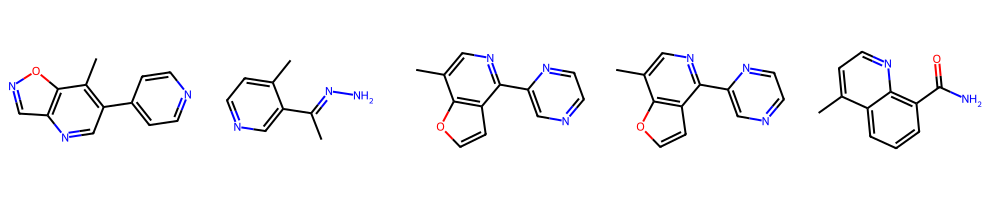

In [13]:
# print the top 10 molecules
# Sort the DataFrame by the 'crystal_size' column in ascending order
from rdkit import Chem
from rdkit.Chem import Draw

initial = [Chem.MolFromSmiles(smiles) for smiles in PSO['SMILES'].head(10)]

PSO_sorted = PSO.sort_values(by='crystal_size', ascending=False)
ABC_sorted = ABC.sort_values(by='crystal_size', ascending=False)
#ABCT_sorted = ABC_T.sort_values(by='crystal_size', ascending=False)
molPSO = [Chem.MolFromSmiles(smiles) for smiles in PSO_sorted['SMILES'].head(5)]
molABC = [Chem.MolFromSmiles(smiles) for smiles in ABC_sorted['SMILES'].head(5)]
#olABCT = [Chem.MolFromSmiles(smiles) for smiles in ABCT_sorted['SMILES'].head(5)]

# Generate molecule images
img1 = Draw.MolsToGridImage(molPSO, molsPerRow=5, subImgSize=(200, 200)) #, legends=data10_df_sorted['SMILES'])
img2 = Draw.MolsToGridImage(molABC, molsPerRow=5, subImgSize=(200, 200)) #, legends=data5_df_sorted['SMILES'])
#img3 = Draw.MolsToGridImage(molABCT, molsPerRow=5, subImgSize=(200, 200)) #, legends=data2_df_sorted['SMILES'])
init = Draw.MolsToGridImage(initial, molsPerRow=5, subImgSize=(200, 200))

img1

['c1ccc(-c2ccc(C3=NCCO3)nc2)nc1', 'Cc1ccnc(-c2cnc3sccc3c2)c1', 'Cc1ccnc(CNC2C=CCCC2)c1', 'CC(N)c1cccnc1-c1ccccn1', 'OCc1cccnc1-c1ccccn1', 'Cc1ccncc1-c1ccncc1', 'Cc1ccnc(COc2cc(C)n[nH]2)c1', 'Cc1c(C2CCCCC2)nc2ccccc2c1C', 'CCc1ccnc(C(=O)O)c1', 'Cc1cc2c(-c3cccnn3)ccnc2cc1[O-]', 'CC1CC=C2N=CC=C(C(C)N)C2O1', 'Cc1ccncc1Cc1nc([NH-])nc2ccsc12', 'Cc1cnc(CO)cc1C', 'Cc1ccnc2cncc(-c3cn[nH]c3)c12']


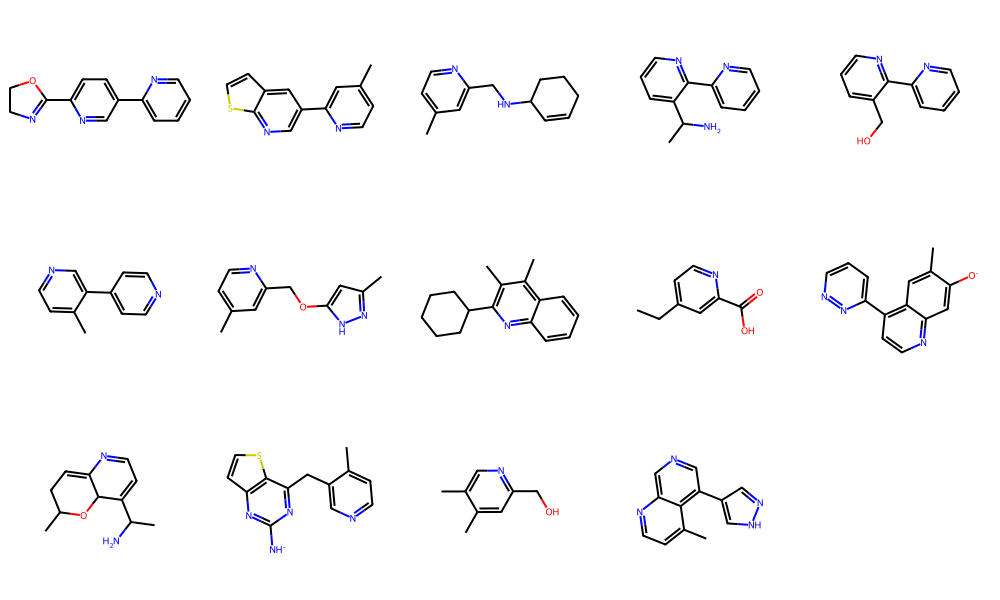

In [23]:
# initial smiles
# print the top 10 molecules
# Sort the DataFrame by the 'crystal_size' column in ascending order
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd

data10 = pd.read_csv('/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/3_Make_New_Data_Predictor/ABC/cycle0.csv')

smiles = list(set(data10['SMILES'].tolist()))
print(smiles)
mol = [Chem.MolFromSmiles(smiles) for smiles in smiles]
img1 = Draw.MolsToGridImage(mol, molsPerRow=5, subImgSize=(200, 200))
img1